<a href="https://colab.research.google.com/github/2yLee/DeepLearning-study/blob/main/DeepLearningFromScratch/%EB%8B%A4%EC%96%91%ED%95%9C_%EC%98%B5%ED%8B%B0%EB%A7%88%EC%9D%B4%EC%A0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

수치미분

In [2]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / 2*h

수치미분을 통해 gradient 구하는 함수 정의

In [3]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

경사 하강법

In [4]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
  return x

SGD를 통해 학습되는 과정과 최적점을 return하는 함수 정의

In [5]:
def gradient_descent_sgd(f, init_x, lr=0.01, step_num=100):
  x = init_x
  optimal_x = init_x
  hist = [x]
  min_val = 9999
  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
    if f(x) < min_val:
      min_val = f(x)
      optimal_x = list(x)

    hist.append(list(x))


  return hist, np.array(optimal_x)

Momentum과 Momentum을 이용한 학습

In [6]:
class Momentum:

    """모멘텀 SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):

        if self.v is None:
            self.v = [0] * len(params)

        for key in range(len(params)):
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]
        return np.array(params)

def gradient_descent_momentum(f, init_x, lr=0.01, step_num=100):
  x = init_x
  optimal_x = init_x
  hist = [x]
  min_val = 9999
  optimizer = Momentum()
  for i in range(step_num):
    grad = numerical_gradient(f, x)

    x = optimizer.update(x, grad)
    if f(x) < min_val:
      min_val = f(x)
      optimal_x = list(x)

    hist.append(list(x))


  return hist, np.array(optimal_x)

AdaGrad와 AdaGrad를 이용한 학습

In [7]:
class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = [0] * len(params)

        for key in range(len(params)):
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
        return params

def gradient_descent_adagrad(f, init_x, lr=0.01, step_num=100):
  x = init_x
  optimal_x = init_x
  hist = [x]
  min_val = 9999
  optimizer = AdaGrad(lr = lr)
  for i in range(step_num):
    grad = numerical_gradient(f, x)

    x = optimizer.update(x, grad)
    if f(x) < min_val:
      min_val = f(x)
      optimal_x = list(x)

    hist.append(list(x))


  return hist, np.array(optimal_x)

RMSprop와 RMSprop를 이용한 학습

In [8]:
class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = [0] * len(params)

        for key in range(len(params)):
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
        return params

def gradient_descent_rmsprop(f, init_x, lr=0.01, step_num=100):
  x = init_x
  optimal_x = init_x
  hist = [x]
  min_val = 9999
  optimizer = RMSprop(lr = lr)
  for i in range(step_num):
    grad = numerical_gradient(f, x)

    x = optimizer.update(x, grad)
    if f(x) < min_val:
      min_val = f(x)
      optimal_x = list(x)

    hist.append(list(x))


  return hist, np.array(optimal_x)



Adam과 Adam을 이용한 학습

In [9]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = [0]*len(params), [0]*len(params)


        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for key in range(len(params)):

            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])

            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
        return params

def gradient_descent_adam(f, init_x, lr=0.01, step_num=100):
  x = init_x
  optimal_x = init_x
  hist = [x]
  min_val = 9999
  optimizer = Adam(lr = lr)
  for i in range(step_num):
    grad = numerical_gradient(f, x)

    x = optimizer.update(x, grad)
    if f(x) < min_val:
      min_val = f(x)
      optimal_x = list(x)

    hist.append(list(x))


  return hist, np.array(optimal_x)

예시함수

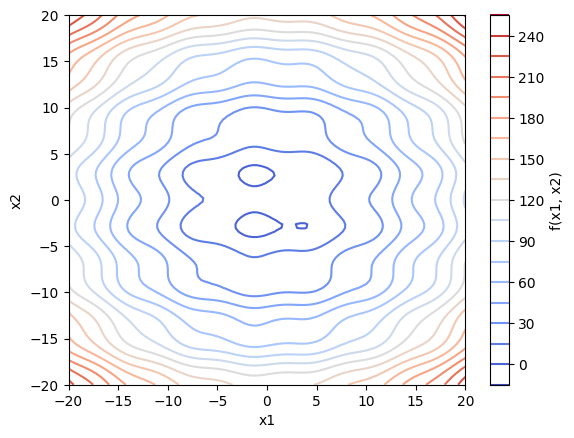

In [10]:
def func1(x):
    return 2*np.sin(x[0])+ (x[0]**2)/4 + 5*np.cos(x[1]) + (x[1]**2)/3 + 0.2*x[1]

# x1, x2 범위 설정
x1 = np.linspace(-20, 20, 100)
x2 = np.linspace(-20, 20, 100)

# 그리드 생성
X1, X2 = np.meshgrid(x1, x2)

# 함수 값 계산
Z = func1([X1, X2])

# 등고선 플롯
plt.contour(X1, X2, Z, levels=20, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')

plt.colorbar(label='f(x1, x2)')
plt.show()


SGD를 통한 학습과정 (보-남-파-초-노-주-빨 순서)

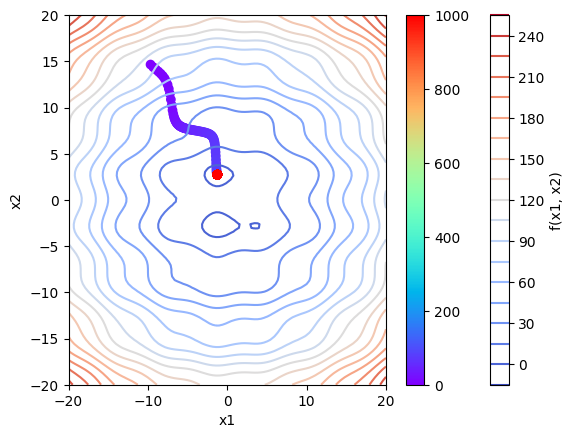

In [11]:
init_x = np.array([-10.0, 15.0])
x1 = np.linspace(-20, 20, 100)
x2 = np.linspace(-20, 20, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = func1([X1, X2])
colors = np.arange(1001)

hist, opt_point = gradient_descent_sgd(func1, init_x, lr = 0.05, step_num = 1000)
Z = func1([X1, X2])
hist = np.array(hist)
colors = np.arange(1001)

plt.contour(X1, X2, Z, levels=20, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')

plt.colorbar(label='f(x1, x2)')
plt.scatter(hist[:,0], hist[:,1], c=colors, cmap='rainbow')
plt.colorbar()
plt.show()

Momentum을 통한 학습과정

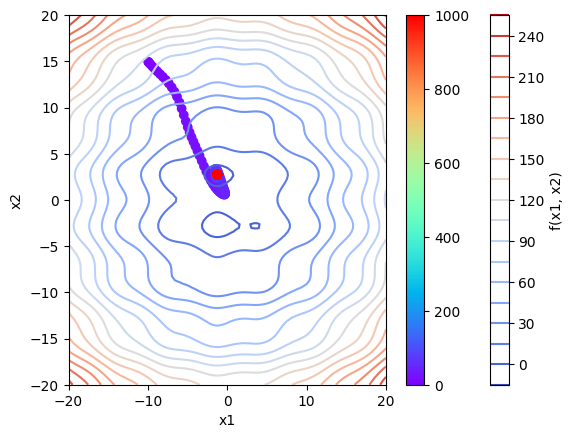

In [12]:
init_x = np.array([-10.0, 15.0])
hist, opt_point = gradient_descent_momentum(func1, init_x, lr = 0.05, step_num = 1000)

hist = np.array(hist)

plt.contour(X1, X2, Z, levels=20, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')

plt.colorbar(label='f(x1, x2)')
plt.scatter(hist[:,0], hist[:,1], c=colors, cmap='rainbow')
plt.colorbar()
plt.show()

AdaGrad를 통한 학습과정

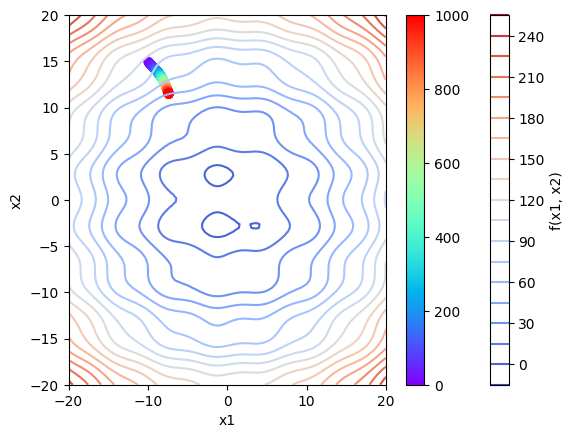

In [13]:
init_x = np.array([-10.0, 15.0])
hist, opt_point = gradient_descent_adagrad(func1, init_x, lr = 0.05, step_num = 1000)

hist = np.array(hist)

plt.contour(X1, X2, Z, levels=20, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')

plt.colorbar(label='f(x1, x2)')
plt.scatter(hist[:,0], hist[:,1], c=colors, cmap='rainbow')
plt.colorbar()
plt.show()

RMSprop를 통한 학습과정

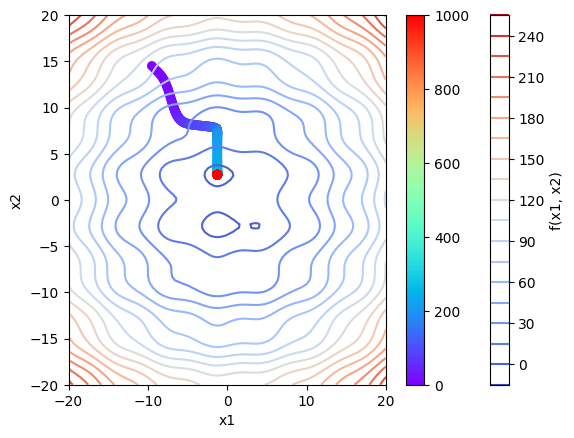

In [14]:
init_x = np.array([-10.0, 15.0])
hist, opt_point = gradient_descent_rmsprop(func1, init_x, lr = 0.05, step_num = 1000)

hist = np.array(hist)

plt.contour(X1, X2, Z, levels=20, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')

plt.colorbar(label='f(x1, x2)')
plt.scatter(hist[:,0], hist[:,1], c=colors, cmap='rainbow')
plt.colorbar()
plt.show()

Adam을 통한 학습과정

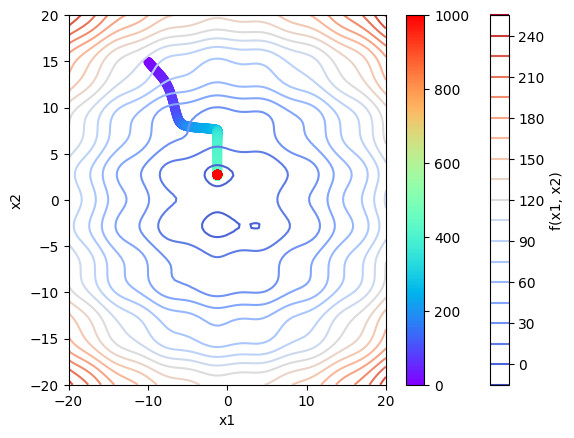

In [15]:
init_x = np.array([-10.0, 15.0])
hist, opt_point = gradient_descent_adam(func1, init_x, lr = 0.05, step_num = 1000)

hist = np.array(hist)

plt.contour(X1, X2, Z, levels=20, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')

plt.colorbar(label='f(x1, x2)')
plt.scatter(hist[:,0], hist[:,1], c=colors, cmap='rainbow')
plt.colorbar()
plt.show()